In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import convex_hull as ch
import graph
from importlib import reload

%matplotlib inline
%config InlineBackend.figure_format='retina'

C:\Users\tm688\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Convex hull demo (N=3)

In [2]:
######### USER DEFINED PARAMETERS ###########
n = 101 # Number of points on the edge 
nComp = 3 # Number of Components (nComp=3) I will generalize
#### DEFINE INTERACTION MATRIX
chi12, chi13, chi23 = 1.5, 2.5, 2.7
chi = np.asarray([[0, chi12, chi13], [chi12, 0 , chi23], [chi13, chi23, 0]])
##############################################

# Define volume fractions
phi = ch.get_phis(nComp=nComp, n=n, ) # Shape: (Number of points, nComp)

# GET FLORY-HUGGINS FREE ENERGY
fe = ch.getF(phi, chi) # Shape: (Number of poitns, )

# CONVEX-HULL
hull, pts = ch.convex_hull(phi, fe) # Reminder: `ch` is a ConvexHull class object.

# COUNT PHASES
dphi = 1/(n-1) # resolution of the phi grid
nPhases, indices = ch.count_phases(hull, pts, dphi, adjacency_tol=6*dphi, useHashTable=True)

fig, ax = ch.plot_ternary_phase_diagram(pts, nPhases, indices, chi=chi,  showTieLines=True)
fig.tight_layout()
plt.show()

... Running convex hull
... Done


Counting phases:   0%|          | 0/4055 [00:00<?, ?it/s]

ValueError: Unknown projection 'ternary'

<Figure size 300x300 with 0 Axes>

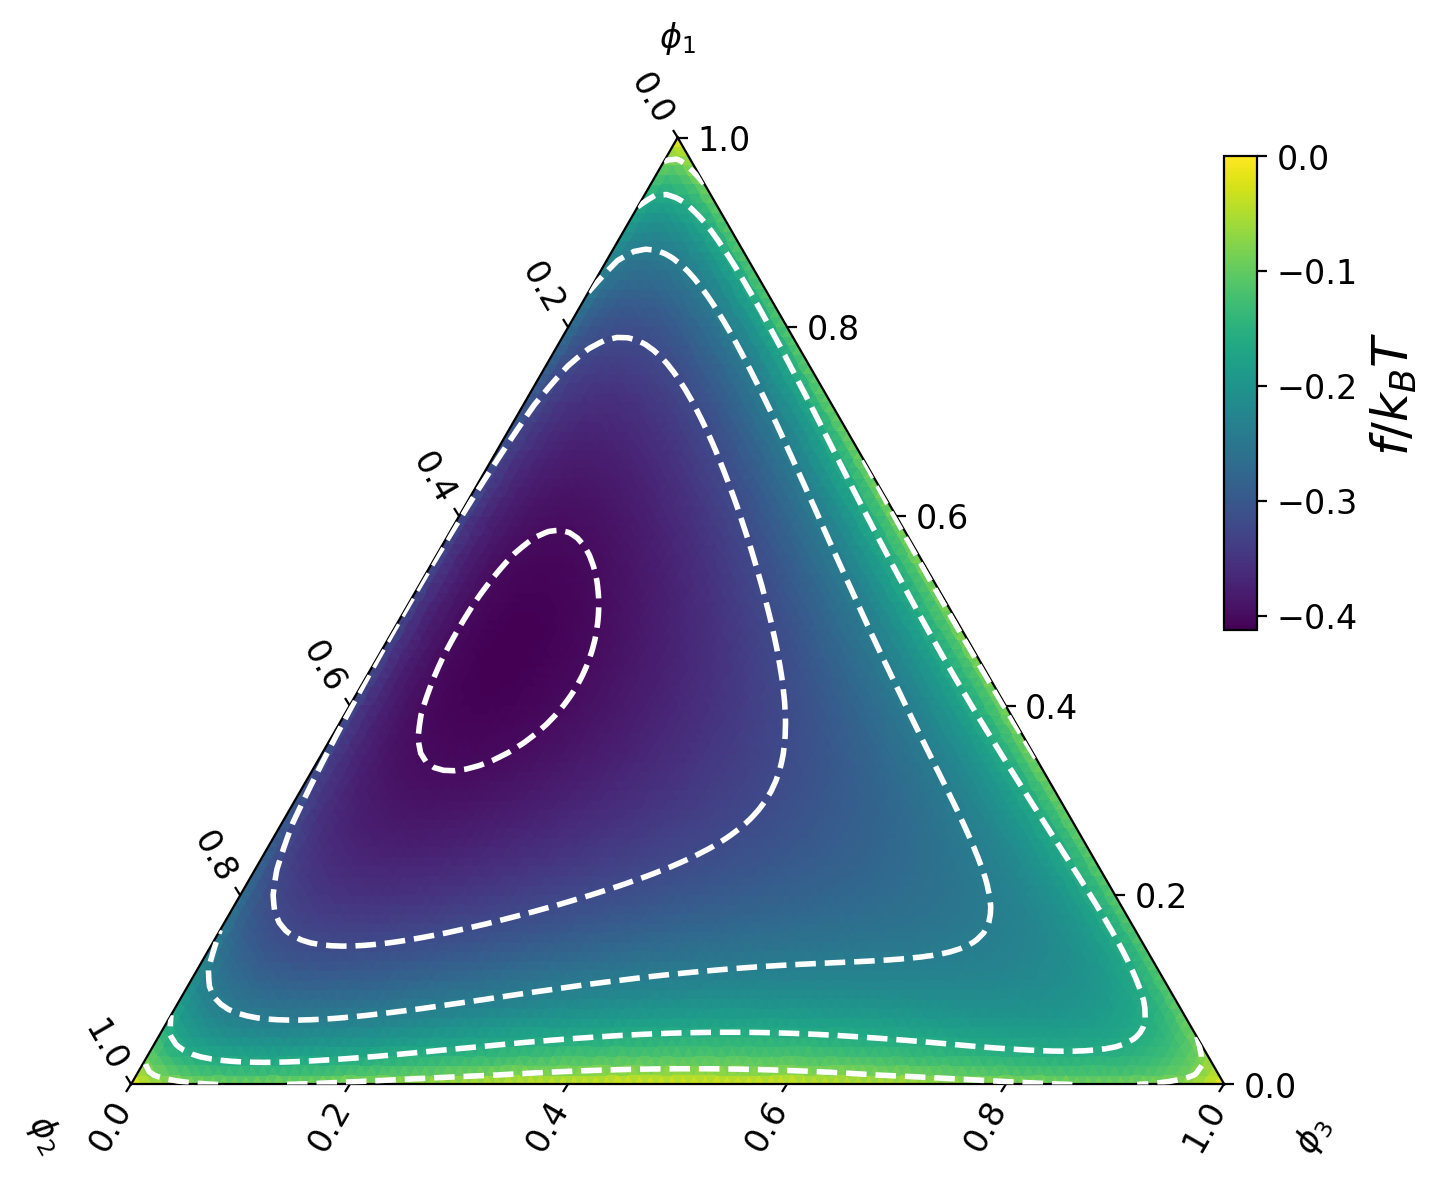

In [305]:
# PLOT FREE ENERGY
reload(ch)
ch.plot_tern(phi, fe)
plt.show()

# Convex-hull N-D system

In [ ]:
reload(ch)
######### USER DEFINED PARAMETERS ###########
n = 21 # Number of points on the edge 
nComp = 5 # Number of Components (nComp=3) I will generalize
#### DEFINE INTERACTION MATRIX
chi = ch.get_random_chi(nComp, chi_mean=2, chi_std=1)
##############################################

# MAKE A PHI (VOLUME FRACITION) GRID
phi = ch.get_phis(nComp=nComp, n=n, ) # Shape: (Number of points, nComp)

# GET FLORY-HUGGINS FREE ENERGY
fe = ch.getF(phi, chi) # Shape: (Number of poitns, )

# CONVEX-HULL
hull, pts = ch.convex_hull(phi, fe) # Reminder: `ch` is a ConvexHull class object.
# COUNT PHASES
dphi = 1/(n-1) # resolution of the phi grid
nPhases, indices = ch.count_phases(hull, pts, dphi, adjacency_tol=6*dphi, useHashTable=True)


array([0, 3, 4, ..., 1, 1, 2])